In [2]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggstream)
library(geomtextpath)
library(ggrepel)

library(bbplot)
source('/home//jupyter/BRI_Figures_Final_V2/helper_function/helper_function_IHA.r')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
color_annotation<-read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_annotation$label<-gsub(" cell",'',color_annotation$label)
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [4]:
df<-read.csv("04_Composite_Score/SF4_CompositeScore_Up.csv")

In [5]:
df$celltype<-gsub(" cell",'',df$celltype)

In [6]:
df <- df %>% group_by(celltype)%>%
  arrange(desc(Ages))%>%
  mutate(label = ifelse(row_number() == 1 & 
                        Ages == max(Ages), 
                        as.character(celltype), 
                        NA_character_))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


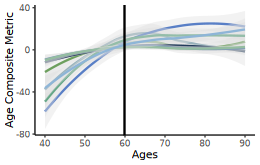

In [25]:
options(repr.plot.width = 55/25.4, repr.plot.height = 35/25.4)

p <- ggplot(data = df, aes(x = Ages, 
                           y = composite_score_sum_scaled_mean, label=celltype,color = celltype, group = celltype)) +
  geom_smooth(se = TRUE, fill = "#E0E0E0", 
              linewidth = 0.5) +
  theme_classic(base_size = 6) +
  scale_color_manual(values = color_vector)  +
  theme_classic(base_size = 6) +
  theme(legend.position = "none")+
 geom_vline(xintercept = 60)+ylab("Age Composite Metric") 


p

ggsave('FigureF.pdf',p,width = 55/25.4,height = 35/25.4)

In [18]:
plot_data <- ggplot_build(p)$data[[1]]

# Step 2: Get the fitted values at the last time point
last_time_point <- max(plot_data$x)
fitted_at_last <- plot_data[plot_data$x == last_time_point, ]

# Order the fitted values and display the order
ordered_fitted <- fitted_at_last[order(fitted_at_last$y), ]
ordered_fitted[c("y","label")] %>% arrange(desc(y))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


,colour,x,y,ymin,ymax,se,flipped_aes,label,group,PANEL,fill,linewidth,linetype,weight,alpha
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
400,#233C5B,90,-1.3518888,-5.25209085,2.548313,1.979379,FALSE,GZMB- CD27- EM CD4 T,5,1,#E0E0E0,0.5,1,1,0.4
80,#6793A4,90,0.1370174,-15.34618040,15.620215,7.857827,FALSE,CM CD4 T,1,1,#E0E0E0,0.5,1,1,0.4
480,#406B9C,90,1.7061131,-2.61169366,6.023920,2.191316,FALSE,GZMB- CD27+ EM CD4 T,6,1,#E0E0E0,0.5,1,1,0.4
560,#95BDA1,90,2.7087849,-1.80730884,7.224879,2.291948,FALSE,GZMK+ CD27+ EM CD8 T,7,1,#E0E0E0,0.5,1,1,0.4
160,#6D9F5E,90,7.7449652,-2.93180731,18.421738,5.418412,FALSE,CM CD8 T,2,1,#E0E0E0,0.5,1,1,0.4
320,#63A686,90,13.2797620,0.05516185,26.504362,6.711422,FALSE,Core naive CD8 T,4,1,#E0E0E0,0.5,1,1,0.4
640,#8EB5D7,90,19.3843870,8.83258157,29.936192,5.354991,FALSE,Naive CD4 Treg,8,1,#E0E0E0,0.5,1,1,0.4
240,#597FC6,90,22.0735350,7.17489883,36.972171,7.561158,FALSE,Core naive CD4 T,3,1,#E0E0E0,0.5,1,1,0.4


y,label
<dbl>,<chr>
22.0735350,Core naive CD4 T
19.3843870,Naive CD4 Treg
13.2797620,Core naive CD8 T
7.7449652,CM CD8 T
2.7087849,GZMK+ CD27+ EM CD8 T
1.7061131,GZMB- CD27+ EM CD4 T
0.1370174,CM CD4 T
-1.3518888,GZMB- CD27- EM CD4 T
